In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

data_path = Path('./data')

data = pd.read_csv(data_path/'train.csv')

test = pd.read_csv(data_path / 'data_for_test.csv')

In [2]:
data.head()

,patient_id,key,gender,age,x1,x2,x3,x4,x5,x6,xx1,xx2,xx3,xx4,xx5,y_mean_MAP,y_mean_HR
0,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,99.9,49.4,62.5,59.04,80.0
1,1891,1891-3,1,75,22,1,2,0,0,1,80.0,94.9,98.4,48.7,61.3,59.04,80.0
2,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,95.3,48.5,60.3,59.04,80.0
3,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,97.4,48.9,61.3,59.04,80.0
4,1891,1891-3,1,75,22,1,2,0,0,1,76.7,95.7,99.6,50.2,62.8,59.04,80.0


stats for test.csv

558 patients in test.csv
13019 "key" values in test.csv


## Distribution of features

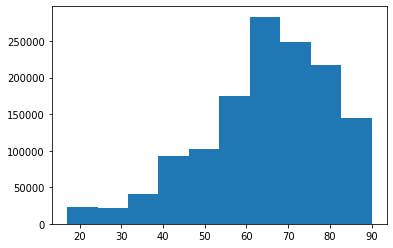

In [17]:
# age distribution
_ = plt.hist(data.age)

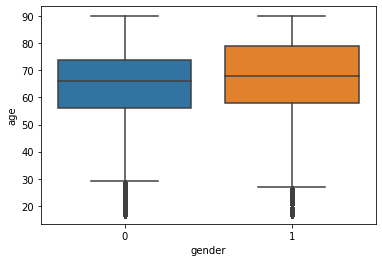

In [21]:
g = sns.boxplot(x="gender", y="age", data=data,)

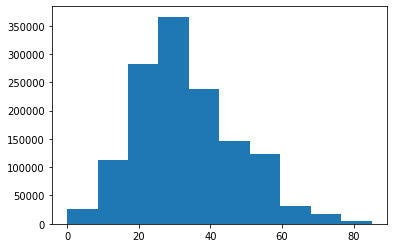

In [23]:
_ = plt.hist(data.x1)

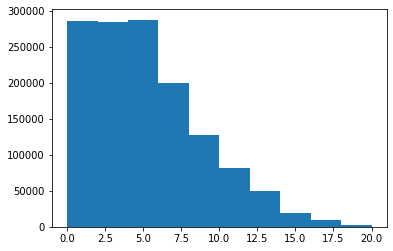

In [27]:
_ = plt.hist(data.x2)

[2 6 1 3 5]


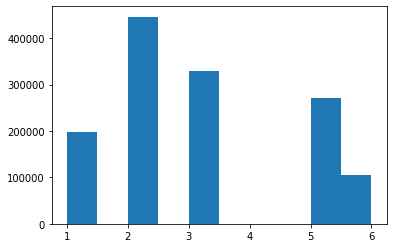

In [35]:
_ = plt.hist(data.x3)
print(data.x3.unique())

[0 1]


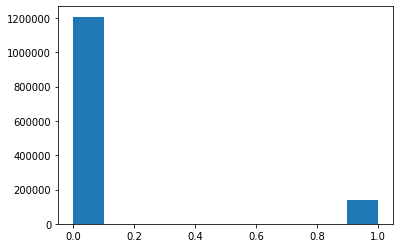

In [34]:
_ = plt.hist(data.x4)
print(data.x4.unique())

[0 1]


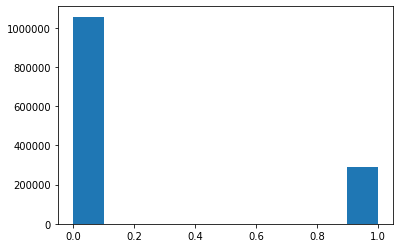

In [33]:
_ = plt.hist(data.x5)
print(data.x5.unique())

[1 0]


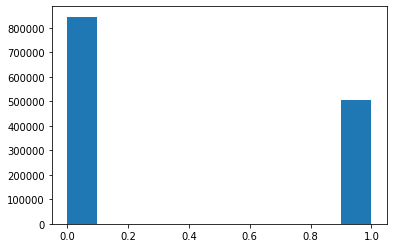

In [32]:
_ = plt.hist(data.x6)
print(data.x6.unique())

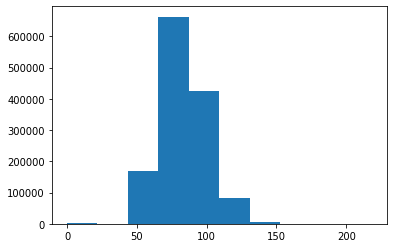

In [37]:
_ = plt.hist(data.xx1)

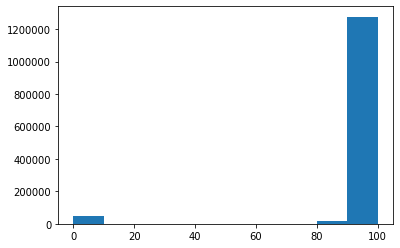

In [38]:
_ = plt.hist(data.xx2)

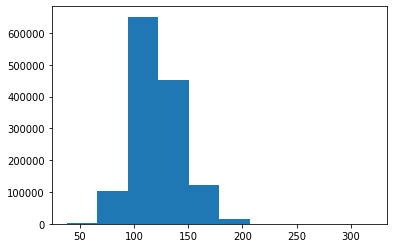

In [39]:
_ = plt.hist(data.xx3)

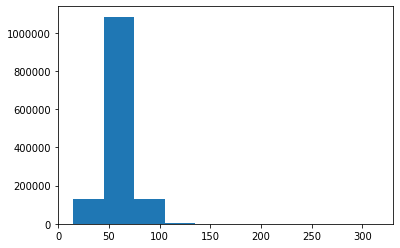

In [40]:
_ = plt.hist(data.xx4)

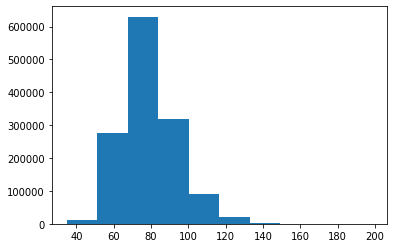

In [41]:
_ = plt.hist(data.xx5)

## Target distribution

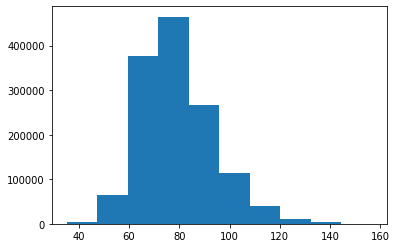

In [43]:
_ = plt.hist(data.y_mean_MAP)

mean_MAP is fairly continuous between 40-160, mean around 80

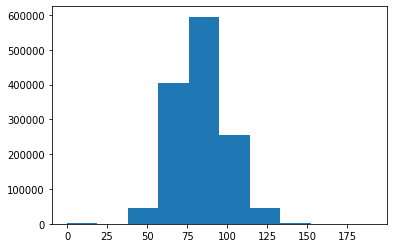

In [44]:
_ = plt.hist(data.y_mean_HR)

some low values of ymean_HR exist 0-20. Leading to death??

## Compare train and test datasets

Text(0.5, 1.0, 'test')

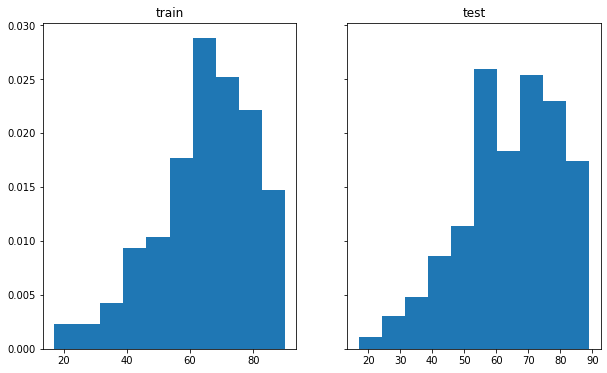

In [79]:
col_name = 'age'
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10,6))
ax0, ax1 = axes.ravel()
_ = ax0.hist(data[col_name], density=True)
ax0.set_title('train')
_ = ax1.hist(test[col_name], density=True)
ax1.set_title('test')

Text(0.5, 1.0, 'test')

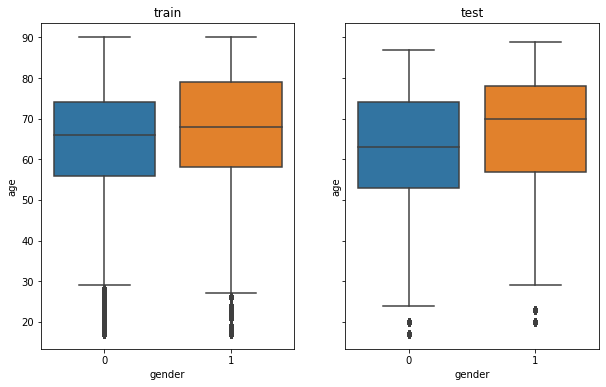

In [80]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10,6))
ax0, ax1 = axes.ravel()
g = sns.boxplot(x="gender", y="age", data=data, ax=ax0)
ax0.set_title('train')
g = sns.boxplot(x="gender", y="age", data=test, ax=ax1)
ax1.set_title('test')

In [85]:
def compare_train_test(col_name):
    fig, axes = plt.subplots(1,2,sharey=True, figsize=(10,6))
    ax0, ax1 = axes.ravel()
    _ = ax0.hist(data[col_name], density=True)
    ax0.set_title('train')
    _ = ax1.hist(test[col_name], density=True)
    ax1.set_title('test')
    fig.suptitle(col_name)
    return fig

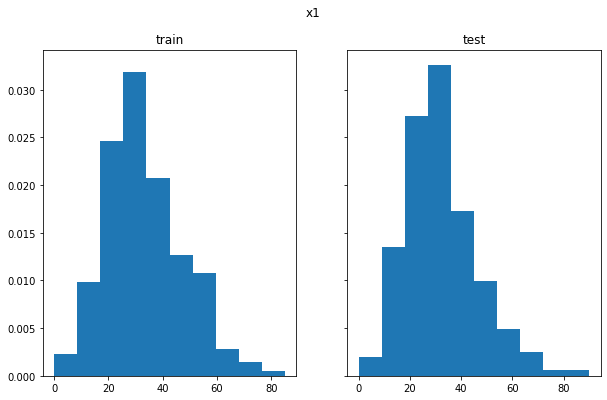

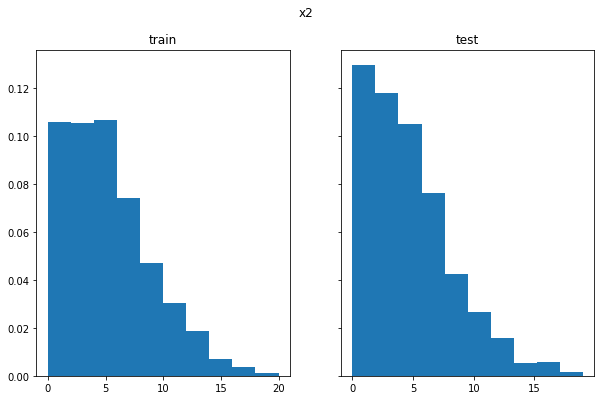

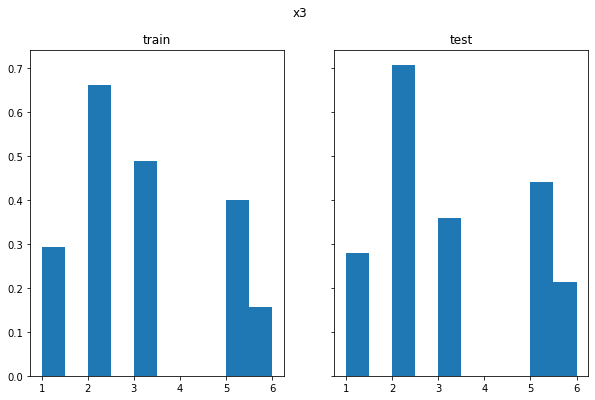

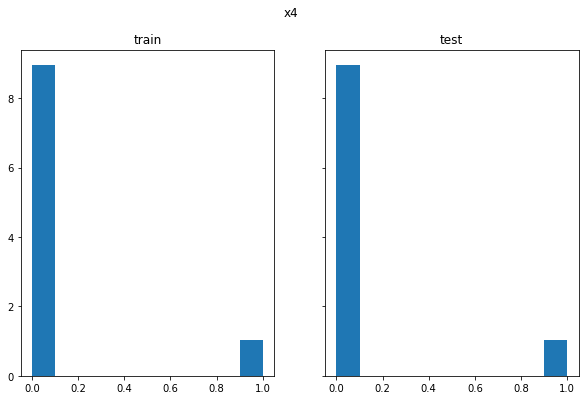

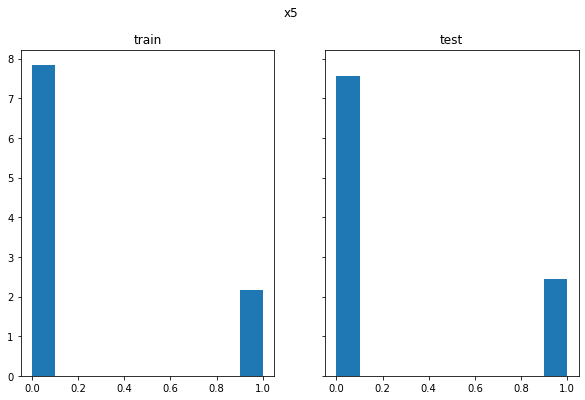

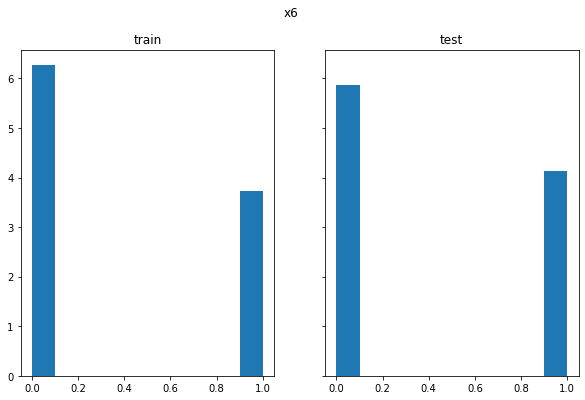

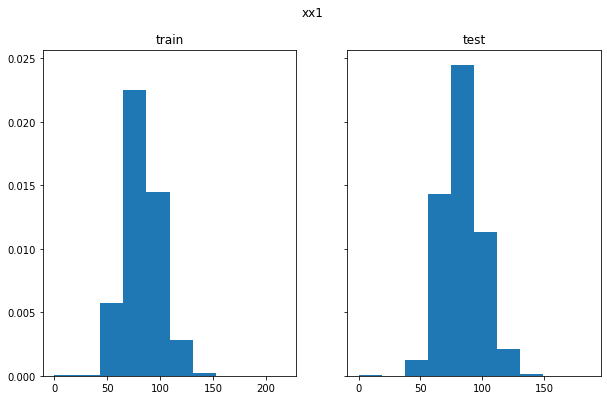

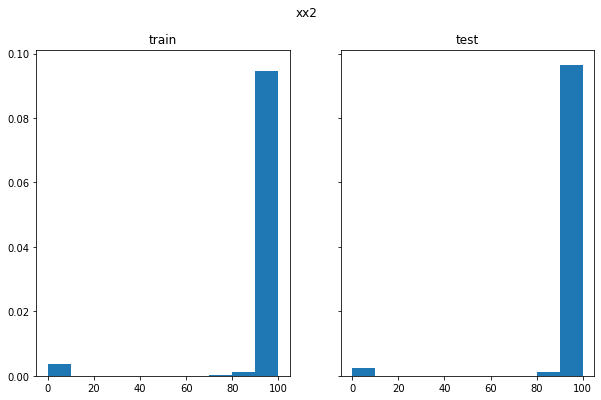

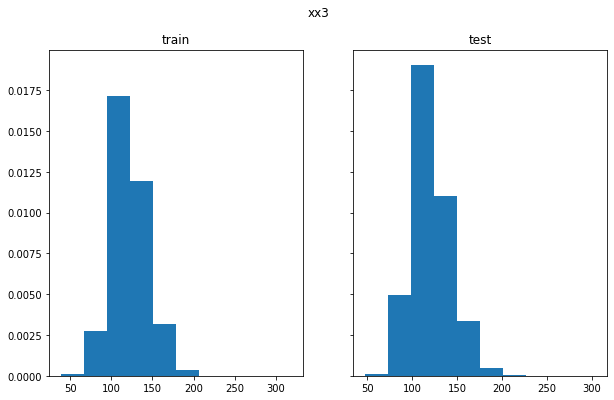

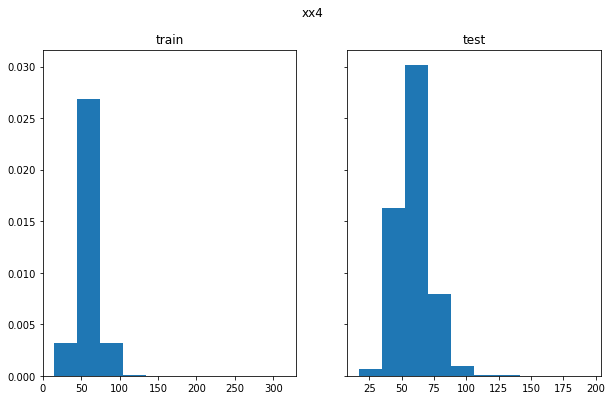

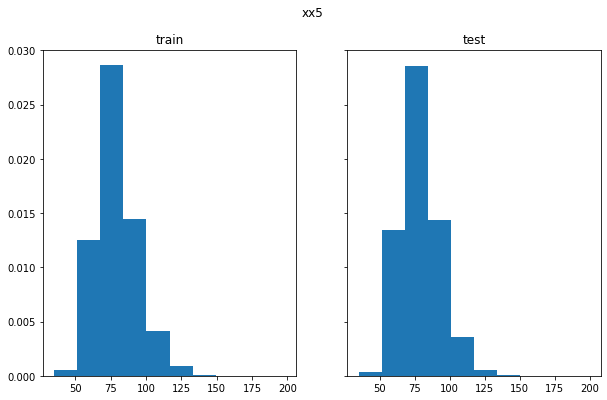

In [93]:
for col_name in ['x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'xx1', 'xx2', 'xx3', 'xx4', 'xx5']:
    _ = compare_train_test(col_name)

In [94]:
data.columns

Index(['patient_id', 'key', 'gender', 'age', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'xx1', 'xx2', 'xx3', 'xx4', 'xx5', 'y_mean_MAP', 'y_mean_HR'],
      dtype='object')

In [95]:
test.columns

Index(['patient_id', 'key', 'gender', 'age', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'xx1', 'xx2', 'xx3', 'xx4', 'xx5'],
      dtype='object')

## Any common patients?

In [98]:
train_patients = set(data.patient_id.tolist())
test_patients = set(test.patient_id.tolist())

common_patients = train_patients.intersection(test_patients)

In [102]:
print(len(common_patients))

0


> No common patients

In [105]:
data.shape, test.shape

((1348470, 17), (390570, 15))

## number of records per patient

In [107]:
train_avg = data.shape[0]//len(train_patients)
test_avg = test.shape[0]//len(test_patients)
print(f"train-test = {train_avg}-{test_avg}")

train-test = 580-699


In [108]:
data.shape[0]//data.key.nunique()

30

In [109]:
test.shape[0]//test.key.nunique()

30

> key represents a window of 30 rows

In [111]:
test[test.patient_id==1005].key.unique()

array(['1005-1', '1005-2', '1005-3', '1005-4', '1005-5', '1005-6',
       '1005-7', '1005-8', '1005-9', '1005-10', '1005-11', '1005-12',
       '1005-13', '1005-14', '1005-15', '1005-16', '1005-17', '1005-18',
       '1005-19', '1005-20', '1005-21', '1005-22', '1005-23', '1005-24',
       '1005-25', '1005-26', '1005-27', '1005-28', '1005-29', '1005-30',
       '1005-31', '1005-32', '1005-33', '1005-34', '1005-35', '1005-36',
       '1005-37', '1005-38', '1005-39', '1005-40', '1005-41', '1005-42',
       '1005-43', '1005-44', '1005-45', '1005-46'], dtype=object)

### patient_id vs targets

In [2]:
data.head()

,patient_id,key,gender,age,x1,x2,x3,x4,x5,x6,xx1,xx2,xx3,xx4,xx5,y_mean_MAP,y_mean_HR
0,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,99.9,49.4,62.5,59.04,80.0
1,1891,1891-3,1,75,22,1,2,0,0,1,80.0,94.9,98.4,48.7,61.3,59.04,80.0
2,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,95.3,48.5,60.3,59.04,80.0
3,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,97.4,48.9,61.3,59.04,80.0
4,1891,1891-3,1,75,22,1,2,0,0,1,76.7,95.7,99.6,50.2,62.8,59.04,80.0


In [3]:
data.groupby('patient_id', as_index=False)['y_mean_MAP'].mean()

2